# Credit Card Fraud Detection ML Model

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

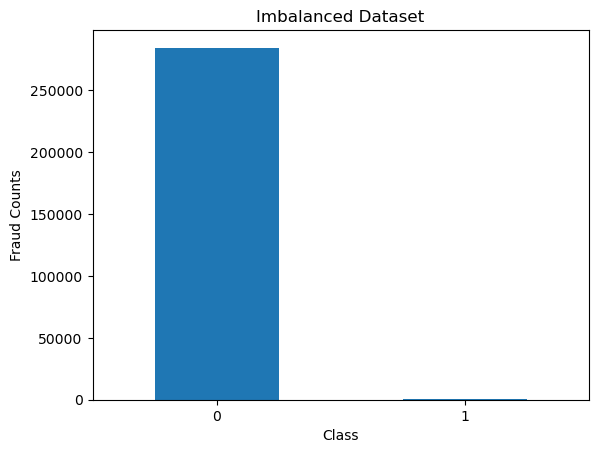

In [8]:
count_class = df.value_counts(df['Class'], sort=True)
count_class.plot(kind='bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Fraud Counts")
plt.title("Imbalanced Dataset")
plt.show()

This dataset is highly imbalanced. 

1 --> Fraud Transactions
0 --> Legit Transactions

In [9]:
# Independent Features
X = df.drop('Class', axis=1)

In [10]:
# Dependent Features
y = df['Class']

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [13]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [14]:
# Performance Metrics of Decision Tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score: \n", accuracy_score(y_test, y_pred_dt))
print("Classification Report: \n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))

Accuracy Score: 
 0.9990519995786665
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.79      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix: 
 [[56831    33]
 [   21    77]]


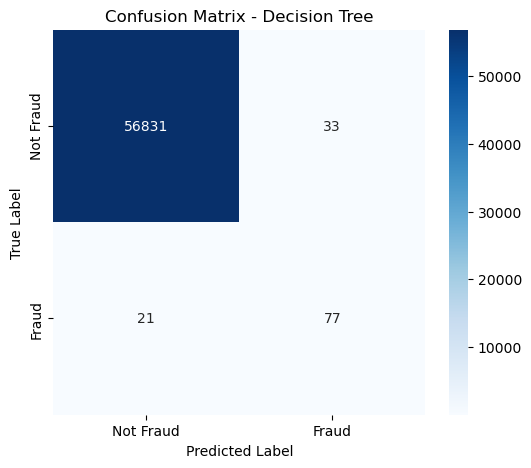

In [15]:
# Plotting Confusion Matrix of Decision Tree

plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Fraud", "Fraud"],
    yticklabels=["Not Fraud", "Fraud"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


# XG Boost

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [18]:
# Performance Metrics of XGBoost

print("Accuracy Score: \n", accuracy_score(y_test, y_pred_xgb))
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))

Accuracy Score: 
 0.9995786664794073
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix: 
 [[56859     5]
 [   19    79]]


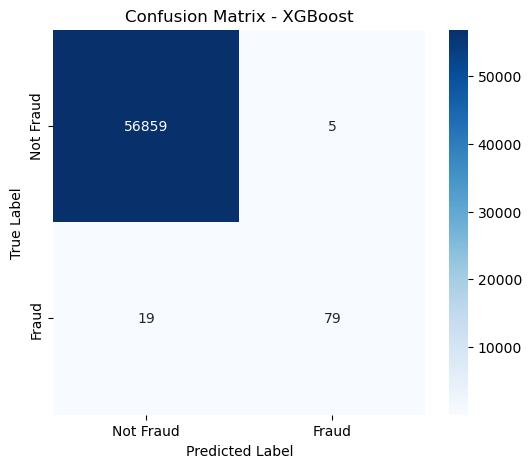

In [19]:
# Plotting Confusion Matrix of Decision Tree

plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_pred_xgb),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Fraud", "Fraud"],
    yticklabels=["Not Fraud", "Fraud"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [20]:
import joblib
joblib.dump(xgb, 'xgboost_fraud_model.pkl')
model = joblib.load('xgboost_fraud_model.pkl') 

# Testing the model

In [23]:
import joblib
import pandas as pd

model = joblib.load("xgboost_fraud_model.pkl")
df = pd.read_csv("creditcard.csv")

X = df.drop(columns=["Class"])
sample = X.iloc[[1]]   

prediction = model.predict(sample)[0]
confidence = model.predict_proba(sample)[0].max()

status_map = {
    0: "Legitimate Transaction",
    1: "Fraudulent Transaction"
}

print("Transaction Status:", status_map[prediction])
print("Confidence:", round(confidence, 2))

Transaction Status: Legitimate Transaction
Confidence: 1.0
